In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

In [3]:
import io
import requests
from zipfile import ZipFile
from IPython.display import display_html

In [4]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

pandas  version: 2.0.3
numpy   version: 1.24.3


In [31]:
df1 = pd.read_csv('exports-of-goods-and-services.csv')
df2 = pd.read_csv('gdp-per-capita.csv')

df = pd.merge(pd.merge(df1, df2), df2, left_index=False, right_index=False, how='inner')
df 

,Entity,Code,Year,ExportsGoodsAndServices,GDPpercapita
0,Albania,ALB,1996,3.261098e+08,4862.4824
1,Albania,ALB,1997,2.665151e+08,4539.8180
2,Albania,ALB,1998,3.566864e+08,4993.0220
3,Albania,ALB,1999,6.174127e+08,5292.0273
4,Albania,ALB,2000,8.574707e+08,5315.4300
...,...,...,...,...,...
6222,Zimbabwe,ZWE,2014,2.577277e+09,2846.5220
6223,Zimbabwe,ZWE,2015,3.824969e+09,2880.9058
6224,Zimbabwe,ZWE,2016,4.628243e+09,2919.6170
6225,Zimbabwe,ZWE,2017,4.850708e+09,3112.8750


In [6]:
df.isnull().sum()

Entity                     0
Code                       0
Year                       0
ExportsGoodsAndServices    0
GDPpercapita               0
dtype: int64

In [7]:
d = df['Entity'].unique()
print('\nจำนวน', d.shape,'ประเทศ ได้แก่\n\n' ,d)


จำนวน (165,) ประเทศ ได้แก่

 ['Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Curacao'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Honduras' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuw

In [8]:
#บันทึกข้อมูลเก็บไว้ใช้งาน 

#df.to_csv('ExpenditureData.csv')
data = pd.read_csv('ExpenditureData.csv')
df = data.drop(['Unnamed: 0'], axis=1) #ลบคอลัมน์ Unnamed: 0
df

,Entity,Code,Year,ExportsGoodsAndServices,GDPpercapita
0,Albania,ALB,1996,3.261098e+08,4862.4824
1,Albania,ALB,1997,2.665151e+08,4539.8180
2,Albania,ALB,1998,3.566864e+08,4993.0220
3,Albania,ALB,1999,6.174127e+08,5292.0273
4,Albania,ALB,2000,8.574707e+08,5315.4300
...,...,...,...,...,...
6222,Zimbabwe,ZWE,2014,2.577277e+09,2846.5220
6223,Zimbabwe,ZWE,2015,3.824969e+09,2880.9058
6224,Zimbabwe,ZWE,2016,4.628243e+09,2919.6170
6225,Zimbabwe,ZWE,2017,4.850708e+09,3112.8750


In [9]:
## Encode labels: การแปลงข้อความให้เป็นตัวเลข 
#from sklearn import preprocessing 
##label_encoder object knows how to understand word labels. 
#label_encoder = preprocessing.LabelEncoder()  
## Encode labels in column 'species'. 
#df['Entity']= label_encoder.fit_transform(df['Entity']) 


In [10]:
##การบันทึกข้อมูลตาราง DataFrame ไปเป็นไฟล์ .csv หรือ .xlsx
#c.to_csv('local_data.csv')
#d.to_excel('LEdata.xlsx')
#df = pd.read_excel(r'D:\HDI\HDI_data.xlsx') #, index_col='State')
#b = pd.read_csv('D:/wbdata/cancer2.csv', index_col='Entity', parse_dates=True)

In [38]:
df.describe().round(2)

,Year,ExportsGoodsAndServices,GDPpercapita
count,6227.00,6.227000e+03,6227.00
mean,1995.25,6.799837e+10,14387.19
std,16.27,1.783473e+11,16570.93
min,1960.00,4.424517e+05,463.26
25%,1983.00,2.298642e+09,2923.25
50%,1998.00,9.325211e+09,7691.66
75%,2009.00,4.813103e+10,20817.54
max,2019.00,2.440000e+12,145062.58


In [12]:
df.shape

(6227, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6227 entries, 0 to 6226
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Entity                   6227 non-null   object 
 1   Code                     6227 non-null   object 
 2   Year                     6227 non-null   int64  
 3   ExportsGoodsAndServices  6227 non-null   float64
 4   GDPpercapita             6227 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 243.4+ KB


In [14]:
df

,Entity,Code,Year,ExportsGoodsAndServices,GDPpercapita
0,Albania,ALB,1996,3.261098e+08,4862.4824
1,Albania,ALB,1997,2.665151e+08,4539.8180
2,Albania,ALB,1998,3.566864e+08,4993.0220
3,Albania,ALB,1999,6.174127e+08,5292.0273
4,Albania,ALB,2000,8.574707e+08,5315.4300
...,...,...,...,...,...
6222,Zimbabwe,ZWE,2014,2.577277e+09,2846.5220
6223,Zimbabwe,ZWE,2015,3.824969e+09,2880.9058
6224,Zimbabwe,ZWE,2016,4.628243e+09,2919.6170
6225,Zimbabwe,ZWE,2017,4.850708e+09,3112.8750


In [15]:
#data5 = data5.loc[:, ['Entity','Code','Year','Breast cancer (deaths)']]
#s = data1.drop([77,140,43,119]) #,axis=0).drop([60604]) #ลบแถว
df1 = df.loc[df['Year'] == 2018].sort_values(['GDPpercapita'],ascending=False) #.drop([147610]) #.rename(columns={'Internet':'y'}) #ข้อมูล ณ วันที่ 7 ธค.2020
df1

,Entity,Code,Year,ExportsGoodsAndServices,GDPpercapita
3470,Macao,MAC,2018,4.449802e+10,99487.21000
2888,Ireland,IRL,2018,4.549290e+11,91647.37000
3432,Luxembourg,LUX,2018,1.254190e+11,88604.07000
5125,Singapore,SGP,2018,6.331510e+11,82761.76000
4359,Norway,NOR,2018,1.480650e+11,75245.91400
...,...,...,...,...,...
3981,Mozambique,MOZ,2018,7.153670e+09,1239.64330
4240,Niger,NER,2018,1.365516e+09,1188.83940
1612,Democratic Republic of Congo,COD,2018,1.271404e+10,1009.11975
1133,Central African Republic,CAF,2018,3.744581e+08,951.71360


In [16]:
df2 = df1.sort_values(['GDPpercapita'],ascending=False).set_index('Entity').head(60)
df2

,Code,Year,ExportsGoodsAndServices,GDPpercapita
Entity,,,,
Macao,MAC,2018,4.449802e+10,99487.210
Ireland,IRL,2018,4.549290e+11,91647.370
Luxembourg,LUX,2018,1.254190e+11,88604.070
Singapore,SGP,2018,6.331510e+11,82761.760
Norway,NOR,2018,1.480650e+11,75245.914
Switzerland,CHE,2018,4.805890e+11,74621.130
Brunei,BRN,2018,6.627385e+09,70022.805
United Arab Emirates,ARE,2018,4.060180e+11,65818.640
Kuwait,KWT,2018,5.989137e+10,64310.188


c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3611 (\N{THAI CHARACTER PO PLA}) missing from current font.
  func(*args, **kwargs)
c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  func(*args, **kwargs)
c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from current font.
  func(*args, **kwargs)
c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  func(*args, **kwargs)
c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\IPython\core\eve

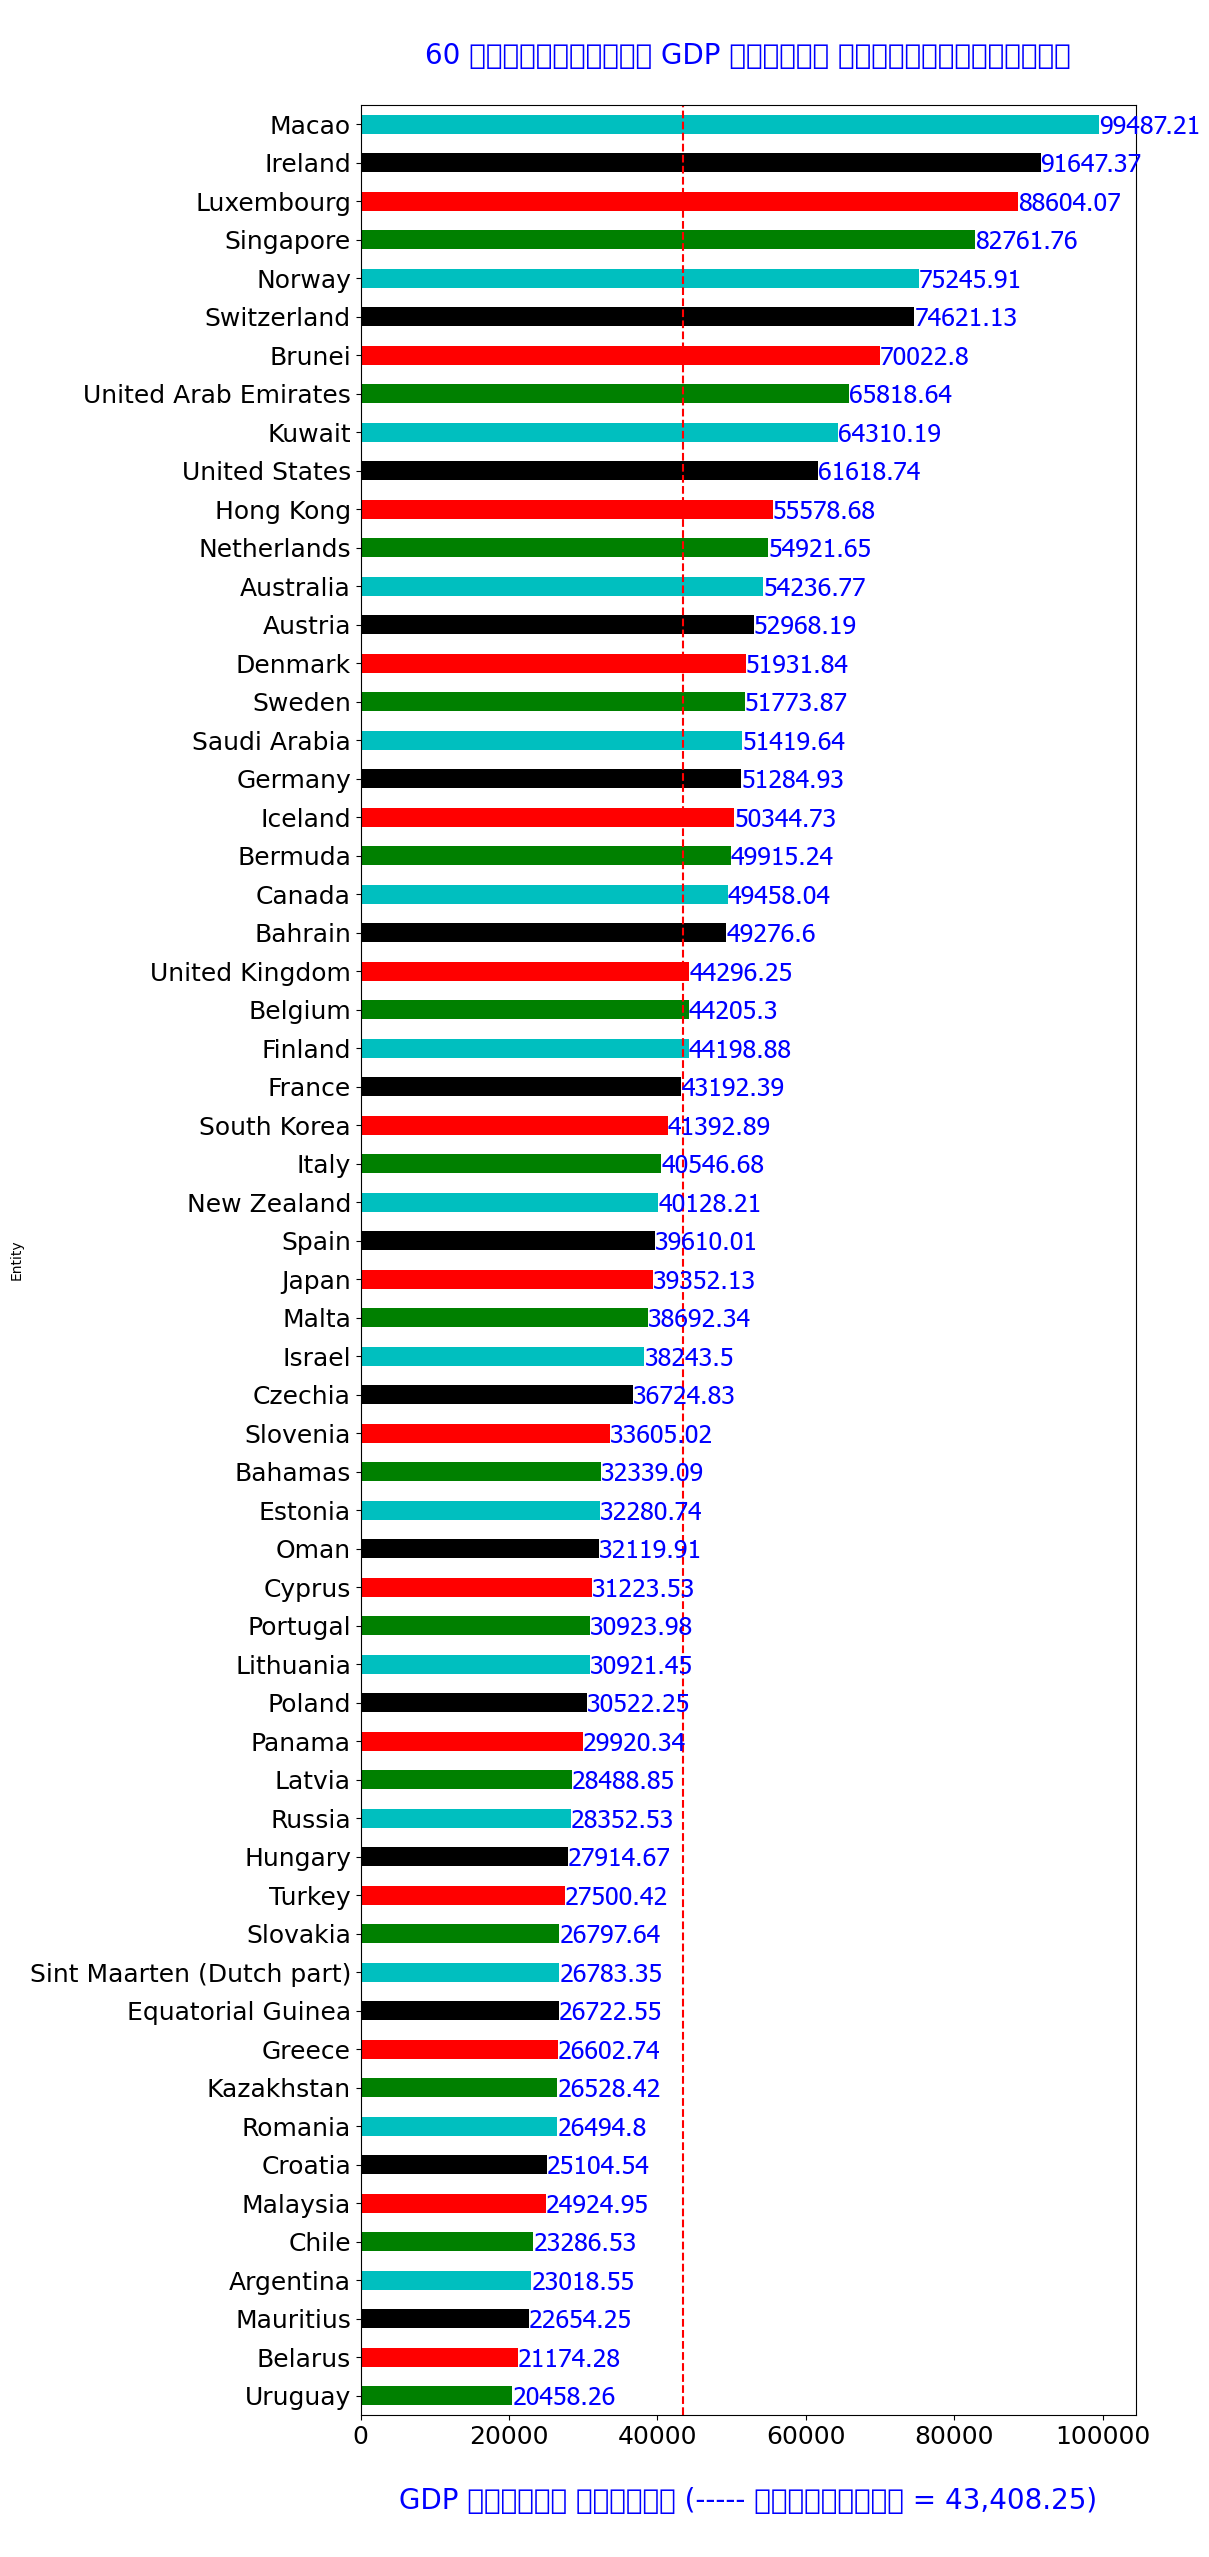

In [17]:
avg = df2['GDPpercapita'].mean() #.sum()/10
plt.axvline(avg, color='red', linestyle='--') 
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=18

ax = df2['GDPpercapita'].sort_values(ascending=True).plot(kind='barh',
                          figsize=(10, 30), #width, length
                          linewidth=25,
                          fontsize=18,
                          color=['green','red','black','c']);

ax.set_title('\n60 ประเทศที่มี GDP ต่อหัว มากที่สุดในโลก\n', 
             fontsize=20, color='blue')
ax.set_xlabel('\nGDP ต่อหัว เฉลี่ย (----- ค่าเฉลี่ย = 43,408.25)\n', fontsize=20, color='blue');

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.01, \
            str(round((i.get_width()), 2)), fontsize=18, color='blue')

# invert for largest on top 
#ax.invert_yaxis()

In [18]:
avg.round(2)

43408.25

In [19]:
df3 = df1.sort_values(['GDPpercapita'],ascending=False).set_index('Entity').tail(30) #.reset_index()
df3

,Code,Year,ExportsGoodsAndServices,GDPpercapita
Entity,,,,
Sudan,SDN,2018,4.296229e+08,4287.10800
Cambodia,KHM,2018,1.454304e+10,4267.49700
Kenya,KEN,2018,1.047496e+10,4127.82960
Cameroon,CMR,2018,6.983505e+09,3606.39580
Nepal,NPL,2018,2.412284e+09,3466.96920
Senegal,SEN,2018,4.913426e+09,3191.47360
Comoros,COM,2018,1.418410e+08,3181.98020
Benin,BEN,2018,3.589280e+09,3118.25150
Zimbabwe,ZWE,2018,3.385144e+09,3007.23700


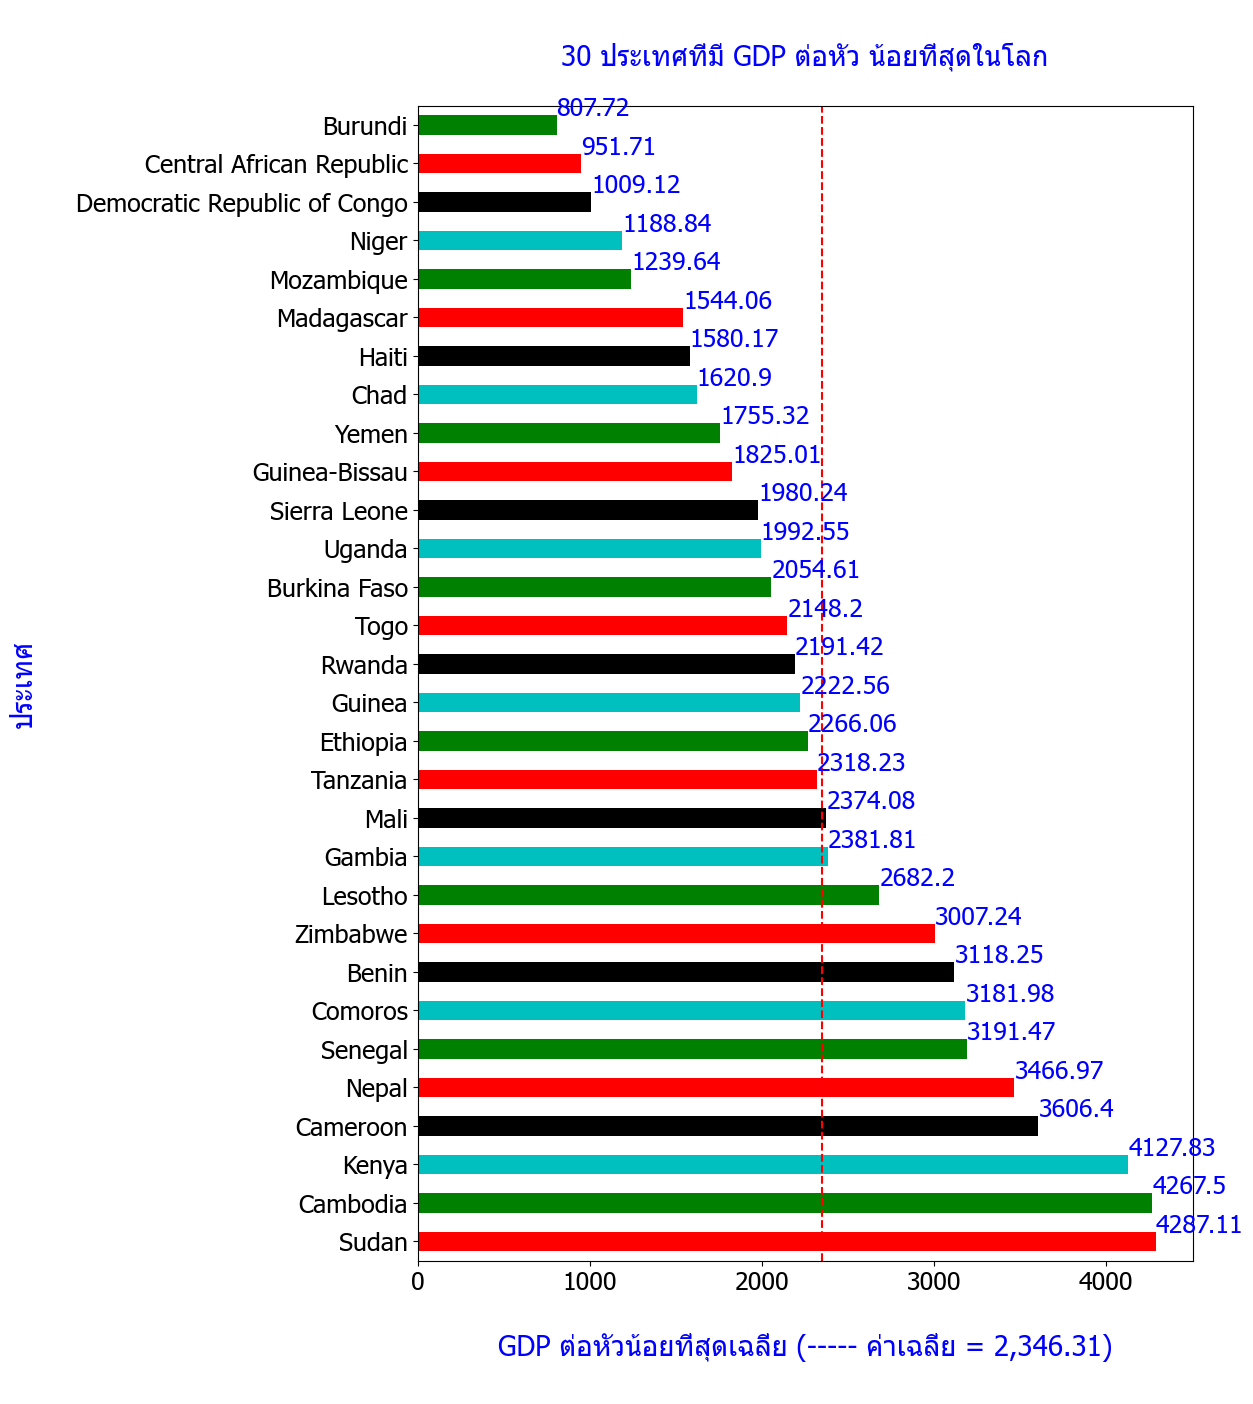

In [20]:
avg = df3['GDPpercapita'].mean() #.sum()/10
plt.axvline(avg, color='red', linestyle='--') 
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=18

ax = df3['GDPpercapita'].sort_values(ascending=True).plot(kind='barh',
                          figsize=(10, 15), #width, length
                          linewidth=25,
                          fontsize=18,
                          color=['green','red','black','c']);

ax.set_title('\n30 ประเทศที่มี GDP ต่อหัว น้อยที่สุดในโลก\n', 
             fontsize=20, color='blue')
ax.set_xlabel('\nGDP ต่อหัวน้อยที่สุดเฉลี่ย (----- ค่าเฉลี่ย = 2,346.31)\n', fontsize=20, color='blue');
ax.set_ylabel('ประเทศ\n', fontsize=20, color='blue');

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.01, \
            str(round((i.get_width()), 2)), fontsize=18, color='blue')

# invert for largest on top 
ax.invert_yaxis()

In [21]:
avg.round(2)

2346.31

In [22]:
# 10 Countries in AEC
AEC = df1.loc[df1['Entity'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])].set_index('Entity') #.reset_index() 
AEC

,Code,Year,ExportsGoodsAndServices,GDPpercapita
Entity,,,,
Singapore,SGP,2018,6.331510e+11,82761.760
Brunei,BRN,2018,6.627385e+09,70022.805
Malaysia,MYS,2018,2.349150e+11,24924.950
Thailand,THA,2018,3.030070e+11,16928.791
Indonesia,IDN,2018,2.077790e+11,11247.842
Philippines,PHL,2018,1.195310e+11,8229.168
Vietnam,VNM,2018,2.634970e+11,7217.924
Myanmar,MMR,2018,1.913223e+10,4919.757
Cambodia,KHM,2018,1.454304e+10,4267.497


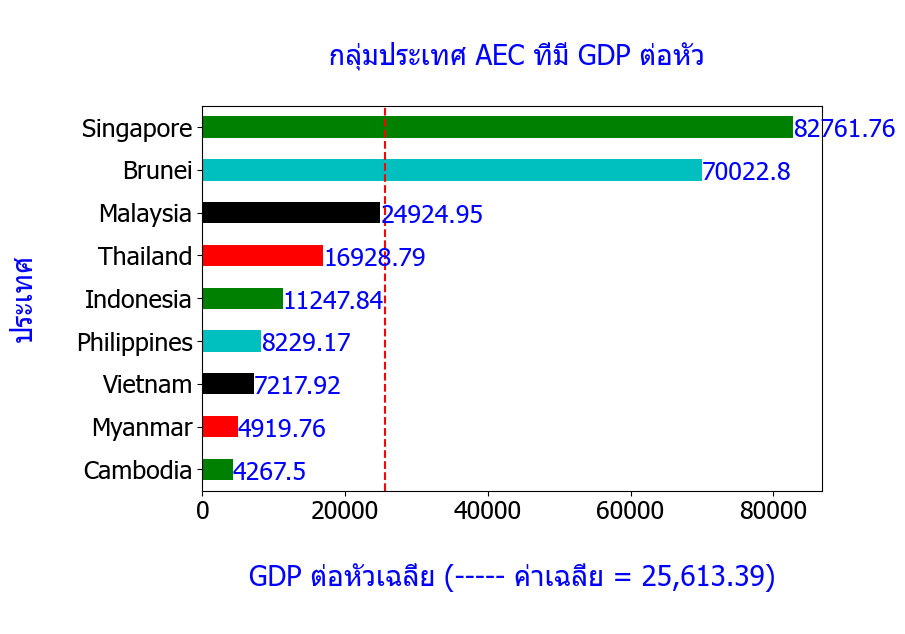

In [39]:
avg = AEC['GDPpercapita'].mean() #.sum()/10
plt.axvline(avg, color='red', linestyle='--') 
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=18

ax = AEC['GDPpercapita'].sort_values(ascending=True).plot(kind='barh',
                          figsize=(8, 5), #width, length
                          linewidth=25,
                          fontsize=18,
                          color=['green','red','black','c']);

ax.set_title('\n กลุ่มประเทศ AEC ที่มี GDP ต่อหัว\n', 
             fontsize=20, color='blue')
ax.set_xlabel('\nGDP ต่อหัวเฉลี่ย (----- ค่าเฉลี่ย = 25,613.39)\n', fontsize=20, color='blue');
ax.set_ylabel('ประเทศ\n', fontsize=20, color='blue');

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.01, \
            str(round((i.get_width()), 2)), fontsize=18, color='blue')

# invert for largest on top 
#ax.invert_yaxis()

In [41]:
avg.round(2)

25613.39

## Simple Linear Regression

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [45]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 2.0.3
numpy   version: 1.24.3
seaborn version: 0.12.2


In [46]:
# df = co.loc[:,['total_deaths','life_expectancy','aged_65_older','aged_70_older','gdp_per_capita','new_cases','population_density']].dropna()

df = pd.read_csv('ExpenditureData.csv')
dm = df.drop(['Unnamed: 0'], axis=1) #ลบคอลัมน์ Unnamed: 0
dm

,Entity,Code,Year,ExportsGoodsAndServices,GDPpercapita
0,Albania,ALB,1996,3.261098e+08,4862.4824
1,Albania,ALB,1997,2.665151e+08,4539.8180
2,Albania,ALB,1998,3.566864e+08,4993.0220
3,Albania,ALB,1999,6.174127e+08,5292.0273
4,Albania,ALB,2000,8.574707e+08,5315.4300
...,...,...,...,...,...
6222,Zimbabwe,ZWE,2014,2.577277e+09,2846.5220
6223,Zimbabwe,ZWE,2015,3.824969e+09,2880.9058
6224,Zimbabwe,ZWE,2016,4.628243e+09,2919.6170
6225,Zimbabwe,ZWE,2017,4.850708e+09,3112.8750


In [47]:
df.isnull().sum()

Unnamed: 0                 0
Entity                     0
Code                       0
Year                       0
ExportsGoodsAndServices    0
GDPpercapita               0
dtype: int64

c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x900 with 0 Axes>

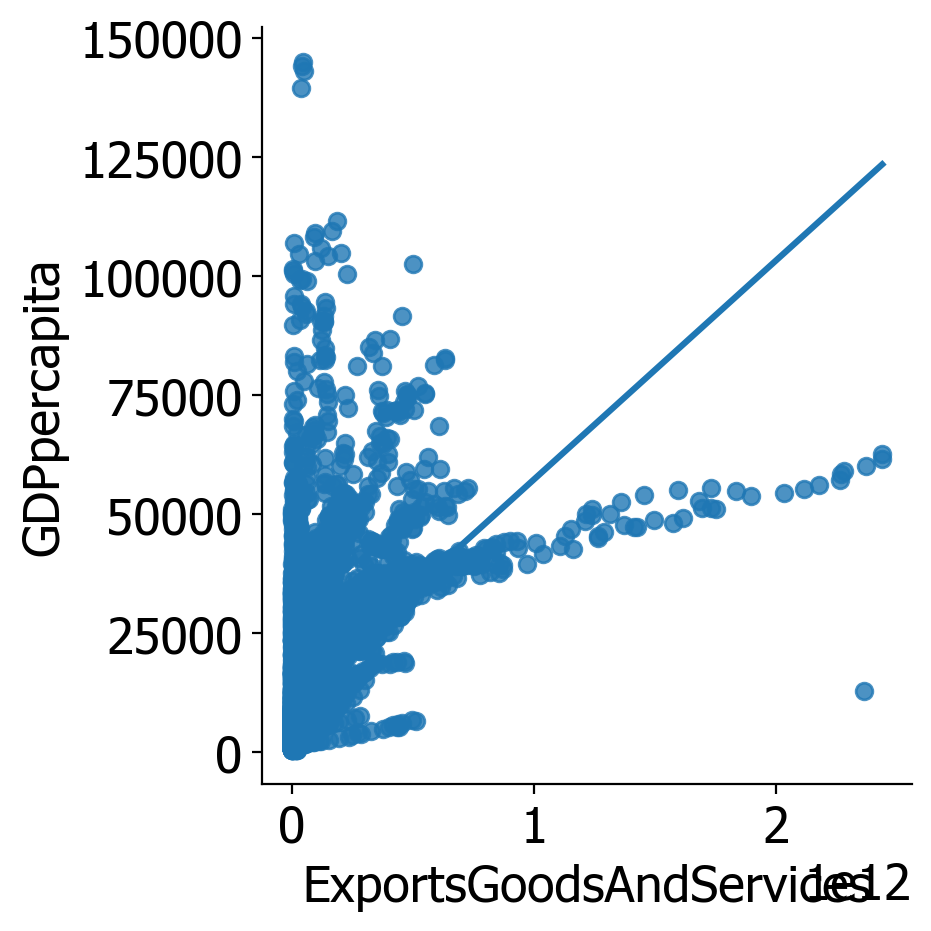

In [48]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='ExportsGoodsAndServices', y='GDPpercapita', data=df, ci=None);

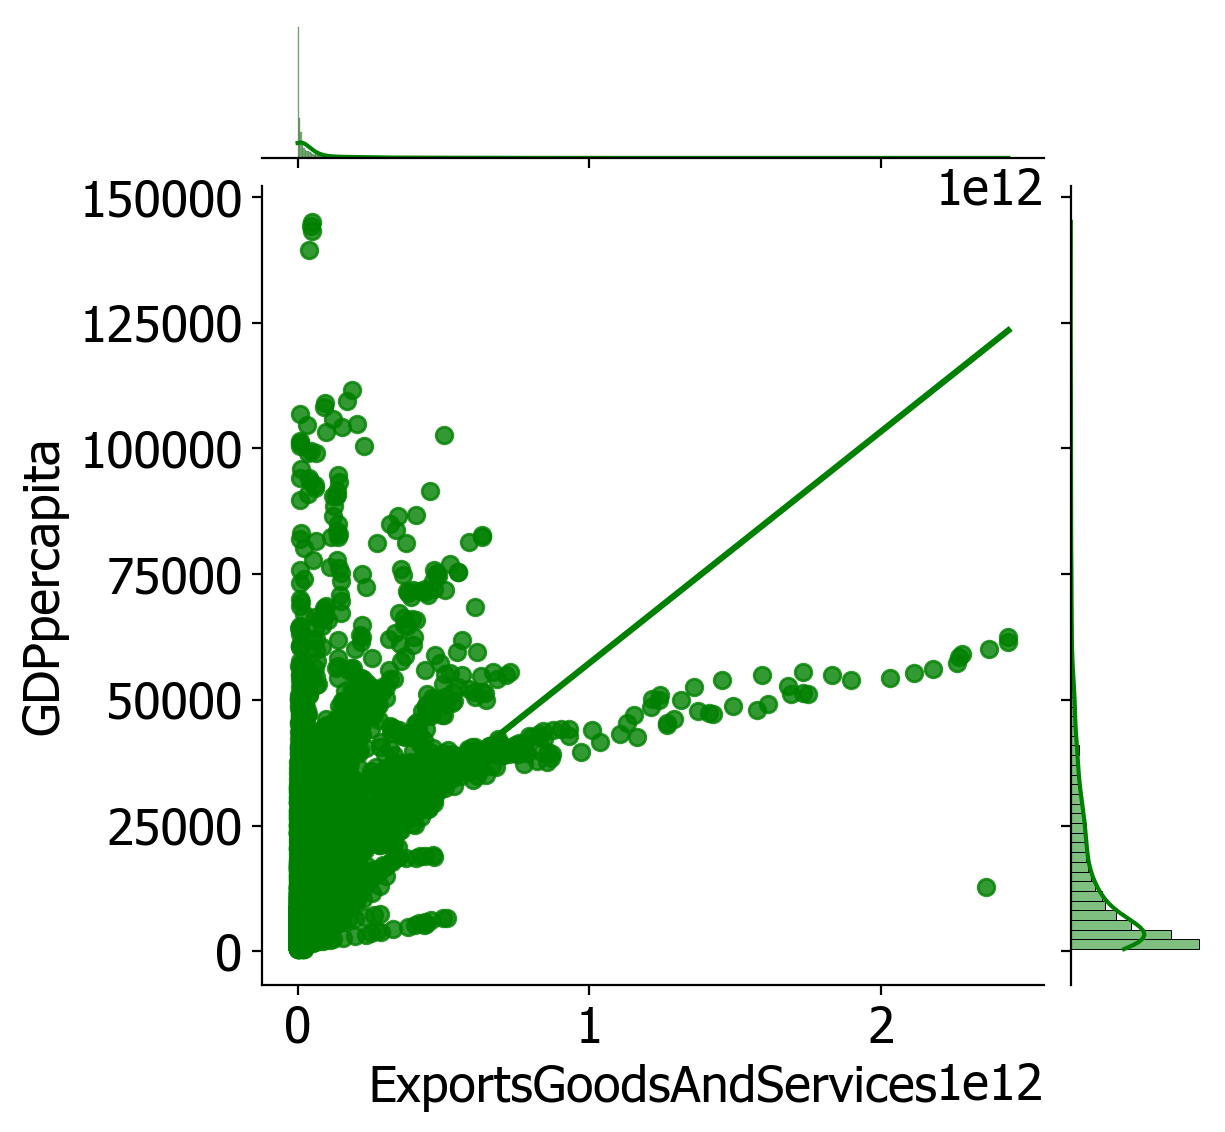

In [49]:
sns.jointplot(x='ExportsGoodsAndServices', y='GDPpercapita', data=df, kind='reg', ci=None,color='green');

In [50]:
dm

,Entity,Code,Year,ExportsGoodsAndServices,GDPpercapita
0,Albania,ALB,1996,3.261098e+08,4862.4824
1,Albania,ALB,1997,2.665151e+08,4539.8180
2,Albania,ALB,1998,3.566864e+08,4993.0220
3,Albania,ALB,1999,6.174127e+08,5292.0273
4,Albania,ALB,2000,8.574707e+08,5315.4300
...,...,...,...,...,...
6222,Zimbabwe,ZWE,2014,2.577277e+09,2846.5220
6223,Zimbabwe,ZWE,2015,3.824969e+09,2880.9058
6224,Zimbabwe,ZWE,2016,4.628243e+09,2919.6170
6225,Zimbabwe,ZWE,2017,4.850708e+09,3112.8750


In [51]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

slr = smf.ols(formula='GDPpercapita ~ ExportsGoodsAndServices', data=dm).fit()
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:           GDPpercapita   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2026.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        10:30:51   Log-Likelihood:                -68456.
No. Observations:                6227   AIC:                         1.369e+05
Df Residuals:                    6225   BIC:                         1.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1

การแปลผล
1) ถ้าค่า p (P>|t|) < 0.05 (ค่า p น้อยกว่า 0.05) แสดงว่ามีความสัมพันธ์กัน คือคือตัวแปรต้น (X หรือเหตุ) เป็นสาเหตุ/ส่งผลต่อตัวแปรตาม (Y หรือผล) เช่น กินจุ (เหตุ) ทำให้อ้วน (ผล) ขณะเดียวกัน อ้วน (เหตุ) ทำให้เป็นโรคความดัน เบาหวาน (ผล) เป็นต้น
2) ถ้าค่า p (P>|t|) > 0.05 (ค่า p มากกว่า 0.05) แสดงว่าไม่มีความสัมพันธ์กัน คือคือตัวแปรต้น (X หรือเหตุ) ไม่เป็นสาเหตุ/ไม่ส่งผลต่อตัวแปรตาม (Y หรือผล) เช่น กินจุ (เหตุ) แต่ก็ไม่ทำให้อ้วน (ผล) ขณะเดียวกัน อ้วน (เหตุ) ไม่ทำให้เป็นโรคความดัน เบาหวาน (ผล) เป็นต้น
3) ค่าอย่างมีนัยสำคัญทางสถิติที่..... 
-ถ้าค่า p < 0.05 แต่ > 0.01 อย่างมีนัยสำคัญทางสถิติที่ 0.05
-ถ้าค่า p < 0.01 แต่ > 0.001 อย่างมีนัยสำคัญทางสถิติที่ 0.01 
-ถ้าค่า p < 0.001 อย่างมีนัยสำคัญทางสถิติที่ 0.000

การอธิบายค่าสัมประสิทธิ์ถดถอย (coef) ถ้าค่าเป็นบวก (0.8963) หมายความว่า x1 (ตัวแปรอิสระ/ต้น: เหตุ) เพิ่มขึ้น ส่งผลให้ Y (ตัวแปรตาม: ผล) เพิ่มตามไปด้วย ขณะเดียวกัน ถ้าค่าเป็นลบ (-0.8963) หมายความว่า x1 (ตัวแปรอิสระ: เหตุ) เพิ่มขึ้น ส่งผลให้ Y (ตัวแปรตาม: ผล) ลดลง

แบบจำลองในการศึกษา 
Y = a + b1x1 + e
กำหนดให้
a = ค่าคงที่ความถดถอยพหุ
b1 = ค่าสัมประสิทธิถดถอยของตัวแปรอิสระ (ตัวแปรต้น)
Y = GDPpercapita GDP ต่อหัว
x = ExportsGoodsAndServices สินค้าและการบริการส่งออก
e = ค่าความคลาดเคลื่อน

การอธิบายแปลผล เอาเฉพาะตัวที่มีนัยสำคัญทางสถิติ คือค่า p < 0.05 เท่านั้นมาอธิบายแปลผล
ผลการศึกษาพบว่า ExportsGoodsAndServices สินค้าและการบริการส่งออก (x) มีความสัมพันธ์ในทิศทางบวกกับ GDPpercapita GDP ต่อหัว (Y) ที่ระดับนัยสำคัญทางสถิติ 0.000 โดยมีค่าสัมประสิทธิ์ ExportsGoodsAndServices สินค้าและการบริการส่งออก เท่ากับ 4.604e-08 หมายความว่า ถ้าหาก ExportsGoodsAndServices สินค้าและการบริการส่งออก เพิ่มขึ้น ส่งผลทำให้ GDPpercapita GDP ต่อหัว เพิ่มตามไปด้วย

# Machine learning for simple linear regression

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [53]:
m = pd.read_csv('advertising.csv')
m

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [54]:
m.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x900 with 0 Axes>

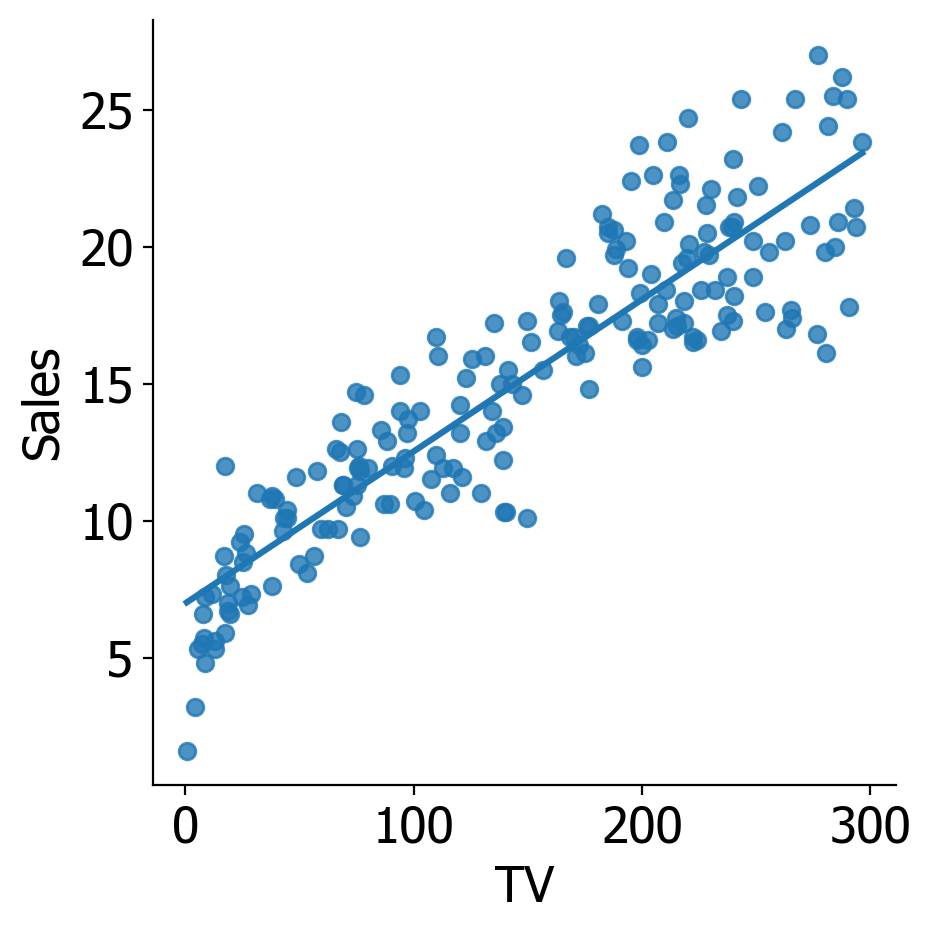

In [55]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='TV', y='Sales', data=m, ci=None);

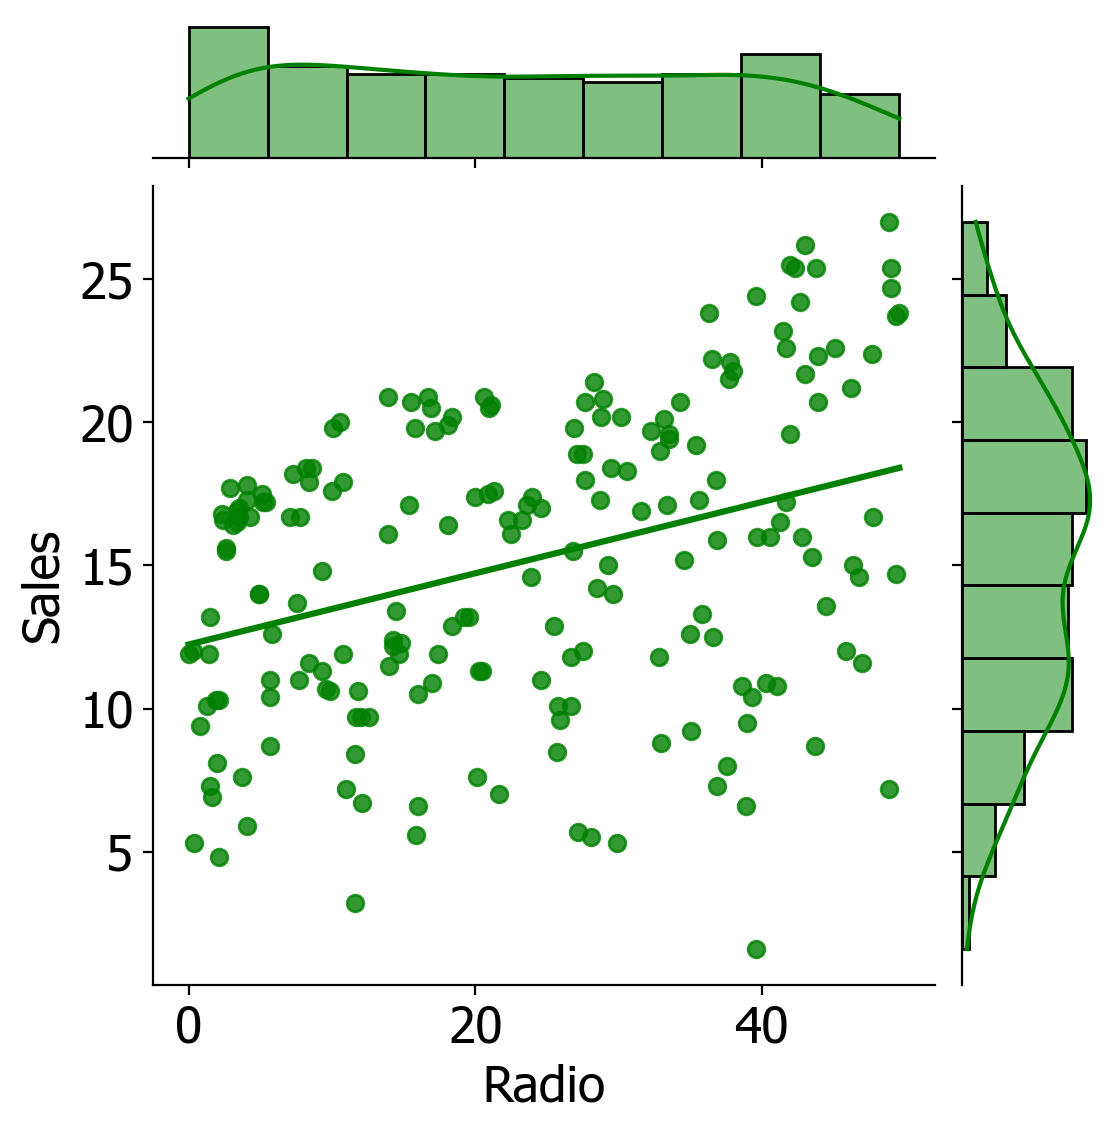

In [56]:
sns.jointplot(x='Radio', y='Sales', data=m, kind='reg', ci=None,color='green');

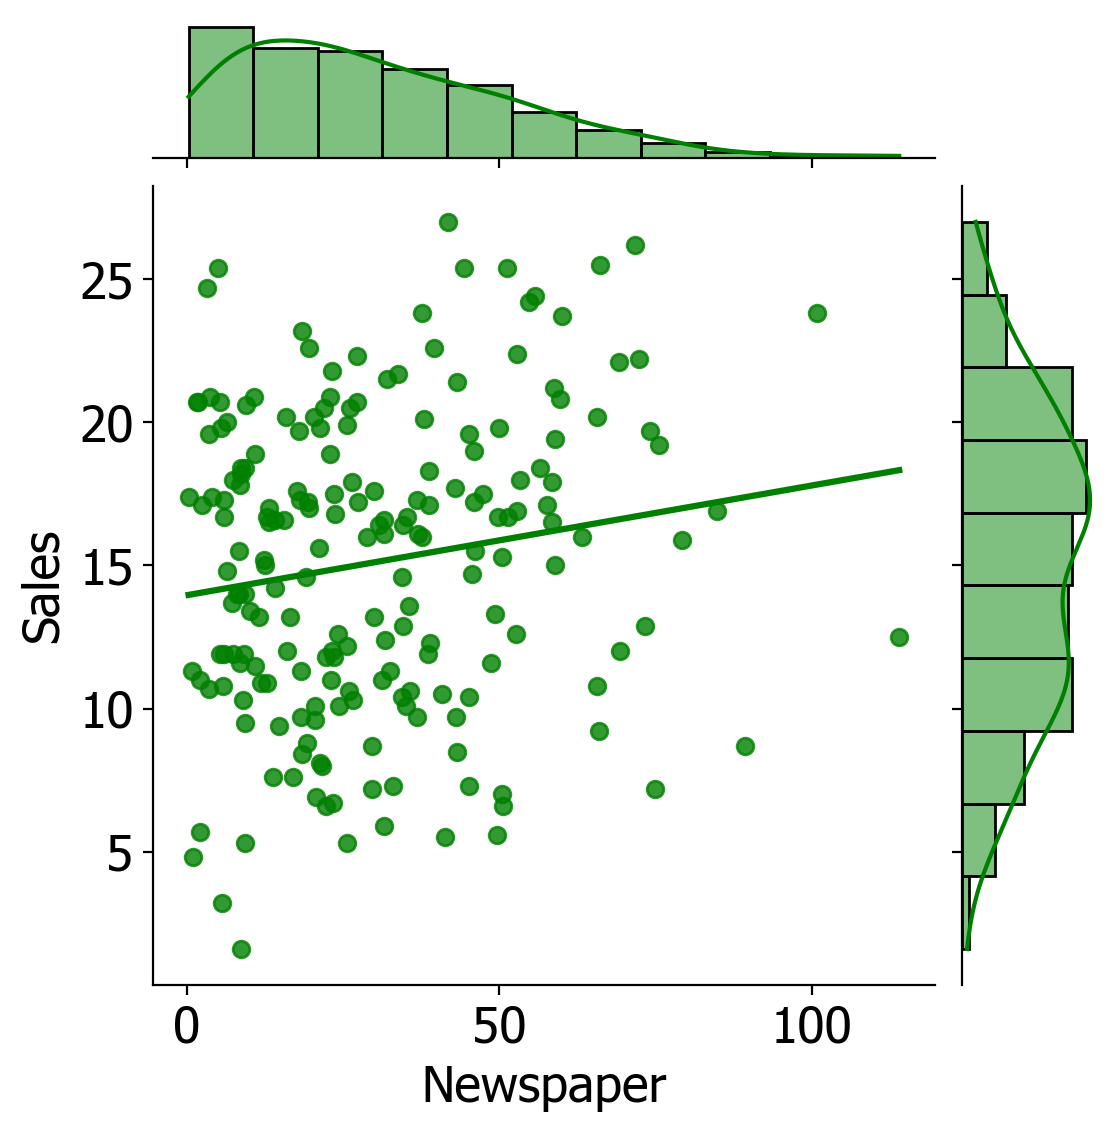

In [57]:
sns.jointplot(x='Newspaper', y='Sales', data=m, kind='reg', ci=None,color='green');

c:\Users\com005\anaconda3\envs\mymiw\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


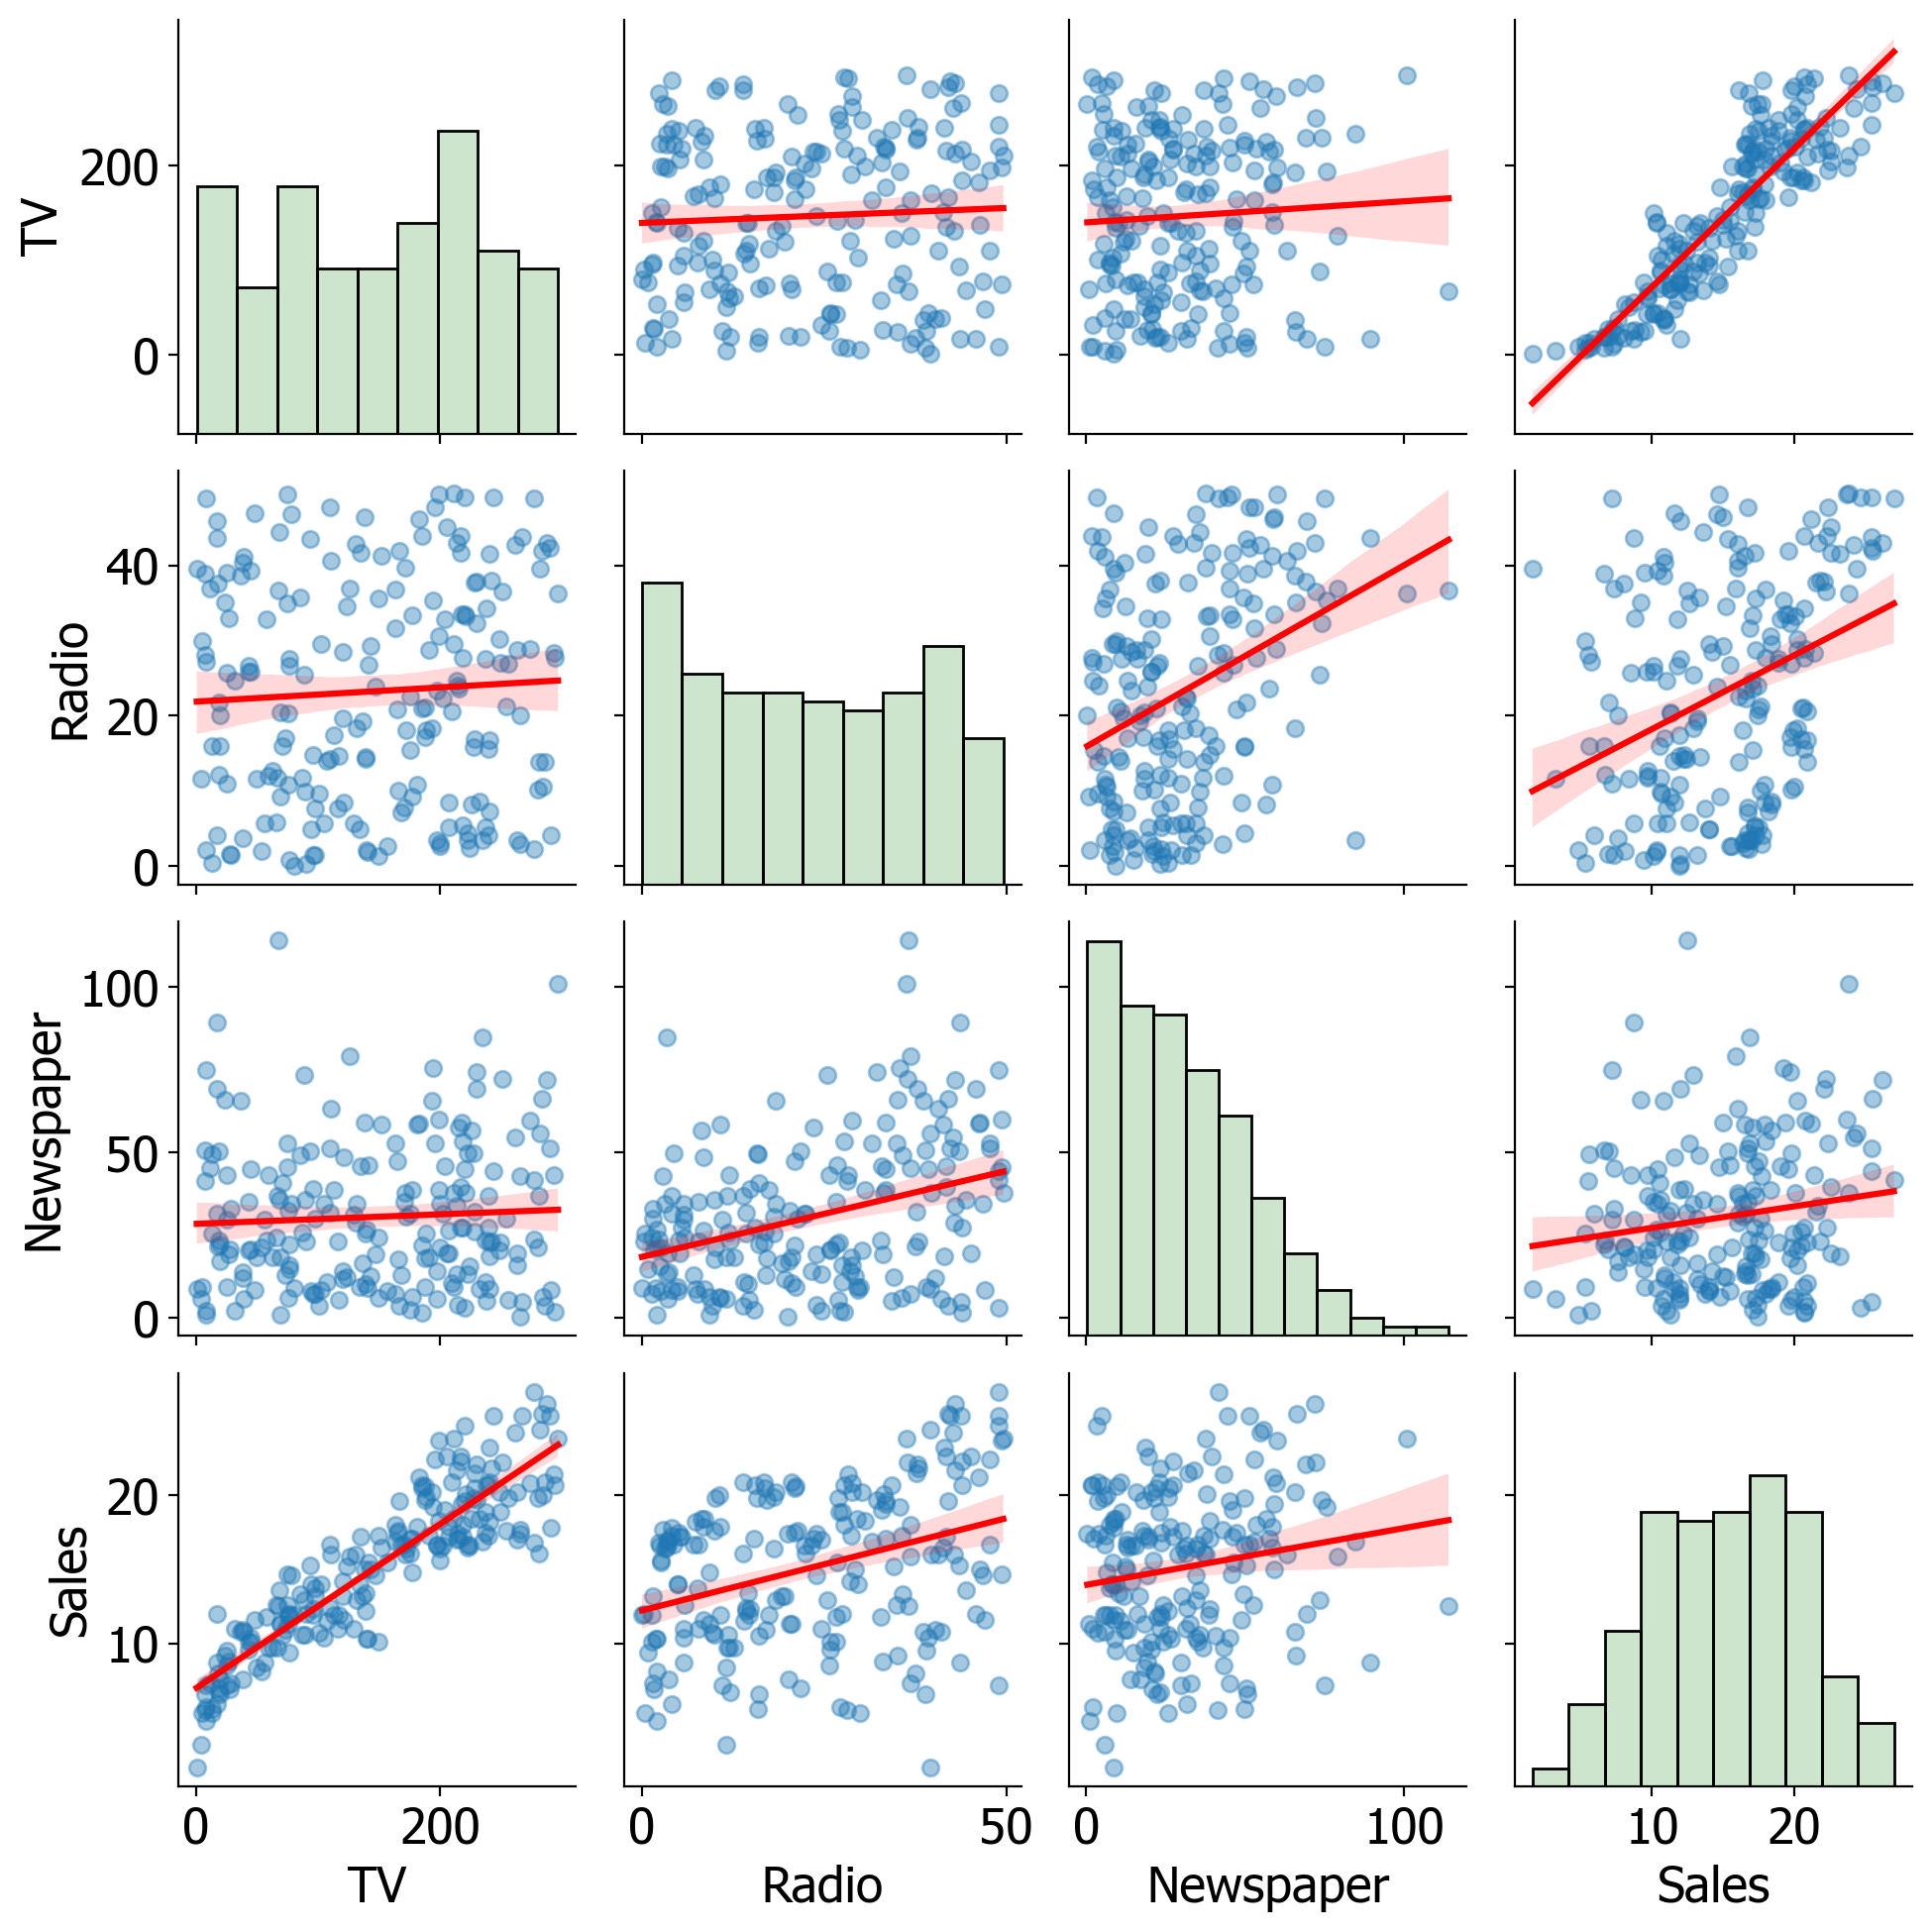

In [58]:
sns.pairplot(m,
             kind='reg', 
             plot_kws={'scatter_kws': {'alpha': 0.4}, 
                       'line_kws': {'color': 'red'}},
             diag_kws={'color': 'green', 'alpha':.2});

In [59]:
sm = m.loc[:,['TV','Sales']]
sm

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [60]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


การแบ่งข้อมูลเพื่อใช้ในการ train_test_split แบบรัน Regression

In [61]:
# X = sm[['TV']].values
# y = sm.Sales.values

X = sm.iloc[:,:-1].values 
y = sm.iloc[:,-1].values 

print('ข้อมูล X:\n', X, 'ข้อมูล y:\n', y)

ข้อมูล X:
 [[230.1]
 [ 44.5]
 [ 17.2]
 [151.5]
 [180.8]
 [  8.7]
 [ 57.5]
 [120.2]
 [  8.6]
 [199.8]
 [ 66.1]
 [214.7]
 [ 23.8]
 [ 97.5]
 [204.1]
 [195.4]
 [ 67.8]
 [281.4]
 [ 69.2]
 [147.3]
 [218.4]
 [237.4]
 [ 13.2]
 [228.3]
 [ 62.3]
 [262.9]
 [142.9]
 [240.1]
 [248.8]
 [ 70.6]
 [292.9]
 [112.9]
 [ 97.2]
 [265.6]
 [ 95.7]
 [290.7]
 [266.9]
 [ 74.7]
 [ 43.1]
 [228. ]
 [202.5]
 [177. ]
 [293.6]
 [206.9]
 [ 25.1]
 [175.1]
 [ 89.7]
 [239.9]
 [227.2]
 [ 66.9]
 [199.8]
 [100.4]
 [216.4]
 [182.6]
 [262.7]
 [198.9]
 [  7.3]
 [136.2]
 [210.8]
 [210.7]
 [ 53.5]
 [261.3]
 [239.3]
 [102.7]
 [131.1]
 [ 69. ]
 [ 31.5]
 [139.3]
 [237.4]
 [216.8]
 [199.1]
 [109.8]
 [ 26.8]
 [129.4]
 [213.4]
 [ 16.9]
 [ 27.5]
 [120.5]
 [  5.4]
 [116. ]
 [ 76.4]
 [239.8]
 [ 75.3]
 [ 68.4]
 [213.5]
 [193.2]
 [ 76.3]
 [110.7]
 [ 88.3]
 [109.8]
 [134.3]
 [ 28.6]
 [217.7]
 [250.9]
 [107.4]
 [163.3]
 [197.6]
 [184.9]
 [289.7]
 [135.2]
 [222.4]
 [296.4]
 [280.2]
 [187.9]
 [238.2]
 [137.9]
 [ 25. ]
 [ 90.4]
 [ 13.1]
 [255.4]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [64]:
y_predict.reshape(-1, 1)

array([[17.69919418],
       [19.92993975],
       [13.36193343],
       [ 7.55551336],
       [16.82418018],
       [10.48302934],
       [16.82418018],
       [ 7.71755299],
       [ 8.19286924],
       [22.04725758],
       [ 8.71139605],
       [13.19449247],
       [12.53012999],
       [ 7.72835563],
       [16.35966658],
       [16.09500185],
       [20.9723947 ],
       [14.98232972],
       [22.7980412 ],
       [ 9.32714664],
       [19.17375481],
       [11.33103673],
       [13.91286817],
       [22.20929721],
       [21.37749378],
       [ 9.316344  ],
       [20.23241373],
       [17.25088454],
       [18.01787212],
       [13.06486077],
       [ 8.61417227],
       [10.8341152 ],
       [11.22841163],
       [22.91146894],
       [14.78248085],
       [ 8.32250094],
       [17.12665416],
       [16.08419921],
       [19.06572839],
       [20.18920316],
       [14.79868481],
       [17.25088454],
       [13.77243382],
       [15.7223107 ],
       [18.20151703],
       [13

In [65]:
sm

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [66]:
#การพยากรณ์ราคาบ้านด้วยจำนวนห้องในแต่ละหลัง
pred = model.predict([[232.1]]).round(2)
print('ถ้าลงทุนโฆษณาสินค้าผ่านทางทีวีจะทำให้ยอดขายเพิ่มขึ้น: ', pred)

ถ้าลงทุนโฆษณาสินค้าผ่านทางทีวีจะทำให้ยอดขายเพิ่มขึ้น:  [19.8]


In [69]:
#Take input from user 
TV = float(input("กรอกข้อมูลการลงทุนโฆษณาสินค้าผ่านทางทีวี: "))

In [68]:
result = model.predict([[TV]])
print("ถ้าลงทุนโฆษณาสินค้าผ่านทางทีวีจะทำให้ยอดขายเพิ่มขึ้น:", result.round(2))

ถ้าลงทุนโฆษณาสินค้าผ่านทางทีวีจะทำให้ยอดขายเพิ่มขึ้น: [19.8]


การประเมินโมเดล Regression มี 4 แบบ ดังนี้ 
1) Mean Absolute Error (MAE) การหาผลรวมระยะคลาดเคลื่อน คือหาว่าโมเดลมีความแม่นยำในการพยากรณ์มากน้อยเพียงใด ถ้า MAE มีค่าน้อยแสดงว่าคลาดเคลื่อนน้อย หมายความว่าโมเดลมีความแม่นยำสูง แต่ถ้าค่า MAE มาก แสดงว่าโมเดลมีความคลาดเคลื่อนมาก คือโมเดลมีความแม่นยำน้อย 
2) Mean Squared Error (MSE) การหาผลรวมระยะคลาดเคลื่อนด้วยวิธียกกำลังสอง การแปลผลเหมือนกับข้อ 1
3) Root Mean Squared Error (RMSE) การหาผลรวมระยะคลาดเคลื่อนด้วยวิธีการถอดรูทรากที่สอง การแปลผลเหมือนกับข้อ 1
4) Coefficients of Determination การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) มีค่าระหว่าง 0 - 1 ถ้าค่าเข้าใกล้ 1 หรือเท่ากับ 1 แสดงว่าโมเดลมีความแม่นยำสูง แต่ถ้าค่าเข้าใกล้ 0 แสดงว่าโมเดลมีความแม่นยำต่ำ

In [70]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('ผลรวมระยะคลาดเคลื่อนเท่ากับ', mean_absolute_error(y_test, y_predict).round(2))
print('ผลรวมระยะคลาดเคลื่อนด้วยวิธียกกำลังสองเท่ากับ', mean_squared_error(y_test, y_predict).round(2))
print('ผลรวมระยะคลาดเคลื่อนด้วยวิธีการถอดรูทรากที่สองเท่ากับ', np.sqrt(mean_squared_error(y_test, y_predict)).round(2))
print('การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ', model.score(X_train, y_train).round(2))
print('การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ', model.score(X, y).round(2))


ผลรวมระยะคลาดเคลื่อนเท่ากับ 1.79
ผลรวมระยะคลาดเคลื่อนด้วยวิธียกกำลังสองเท่ากับ 4.72
ผลรวมระยะคลาดเคลื่อนด้วยวิธีการถอดรูทรากที่สองเท่ากับ 2.17
การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ 0.8
การหาค่าสัมประสิทธิ์การตัดสินใจ หรือ R square (R2) เท่ากับ 0.81


การบันทึกโมเดล เพื่อนำไปใช้งาน หรือนำไปพัฒนาระบบดิจิทัลด้วย Python Django

In [71]:
#https://www.youtube.com/watch?v=rNhVBv0i4os
# วิธีที่ 1

# from joblib import dump

# dump(model, 'model.joblib')

In [72]:
# # วิธีที่ 2
# from pandas import read_csv

# #Pickle model 
# pd.to_pickle(model, 'model.pickle')

# #Unpickle model 
# model = pd.read_pickle('model.pickle')

In [73]:
#conda install -c anaconda scikit-learn
#pip install -U scikit-learn
#from sklearn.externals import joblib
import numpy as np
import joblib

joblib.dump(model, 'tvs_model.pkl')
model = joblib.load('tvs_model.pkl')

การนำข้อมูลที่ฝึกสอนแล้วมารัน OLS Regression Model

In [74]:
import statsmodels.api as sm
# create a fitted model & print the summary
lm = sm.OLS(y_train, X_train).fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.925
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              1713.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):                    4.86e-80
Time:                        11:08:26   Log-Likelihood:                         -405.88
No. Observations:                 140   AIC:                                      813.8
Df Residuals:                     139   BIC:                                      816.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------